**Exploratory Data Analysis and Model Building on Bank Dataset**

In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


**Loading data**

In [3]:
bank_data=pd.read_csv('bank.csv')

In [4]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
print(bank_data.shape)
print(bank_data.info())

(11162, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [6]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
for col in bank_data.select_dtypes(include='object').columns:
    print(col)
    print(bank_data[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


**Exploratory Data Analysis**

In [8]:
#To find the missing values
features_na= [features for features in bank_data.columns if bank_data[features].isnull().sum()>0]
for feature in features_na:
    print(feature, np.round(bank_data[feature].isnull().mean(), 4), '%missing values')
else:
    print("No missing values found")

No missing values found


In [9]:
#Find features with the unique value
for column in bank_data.columns:
    print(column,bank_data[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


In [22]:
#To explore the categorical columns
categorical_features=[feature for feature in bank_data.columns if ((bank_data[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [23]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(bank_data[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


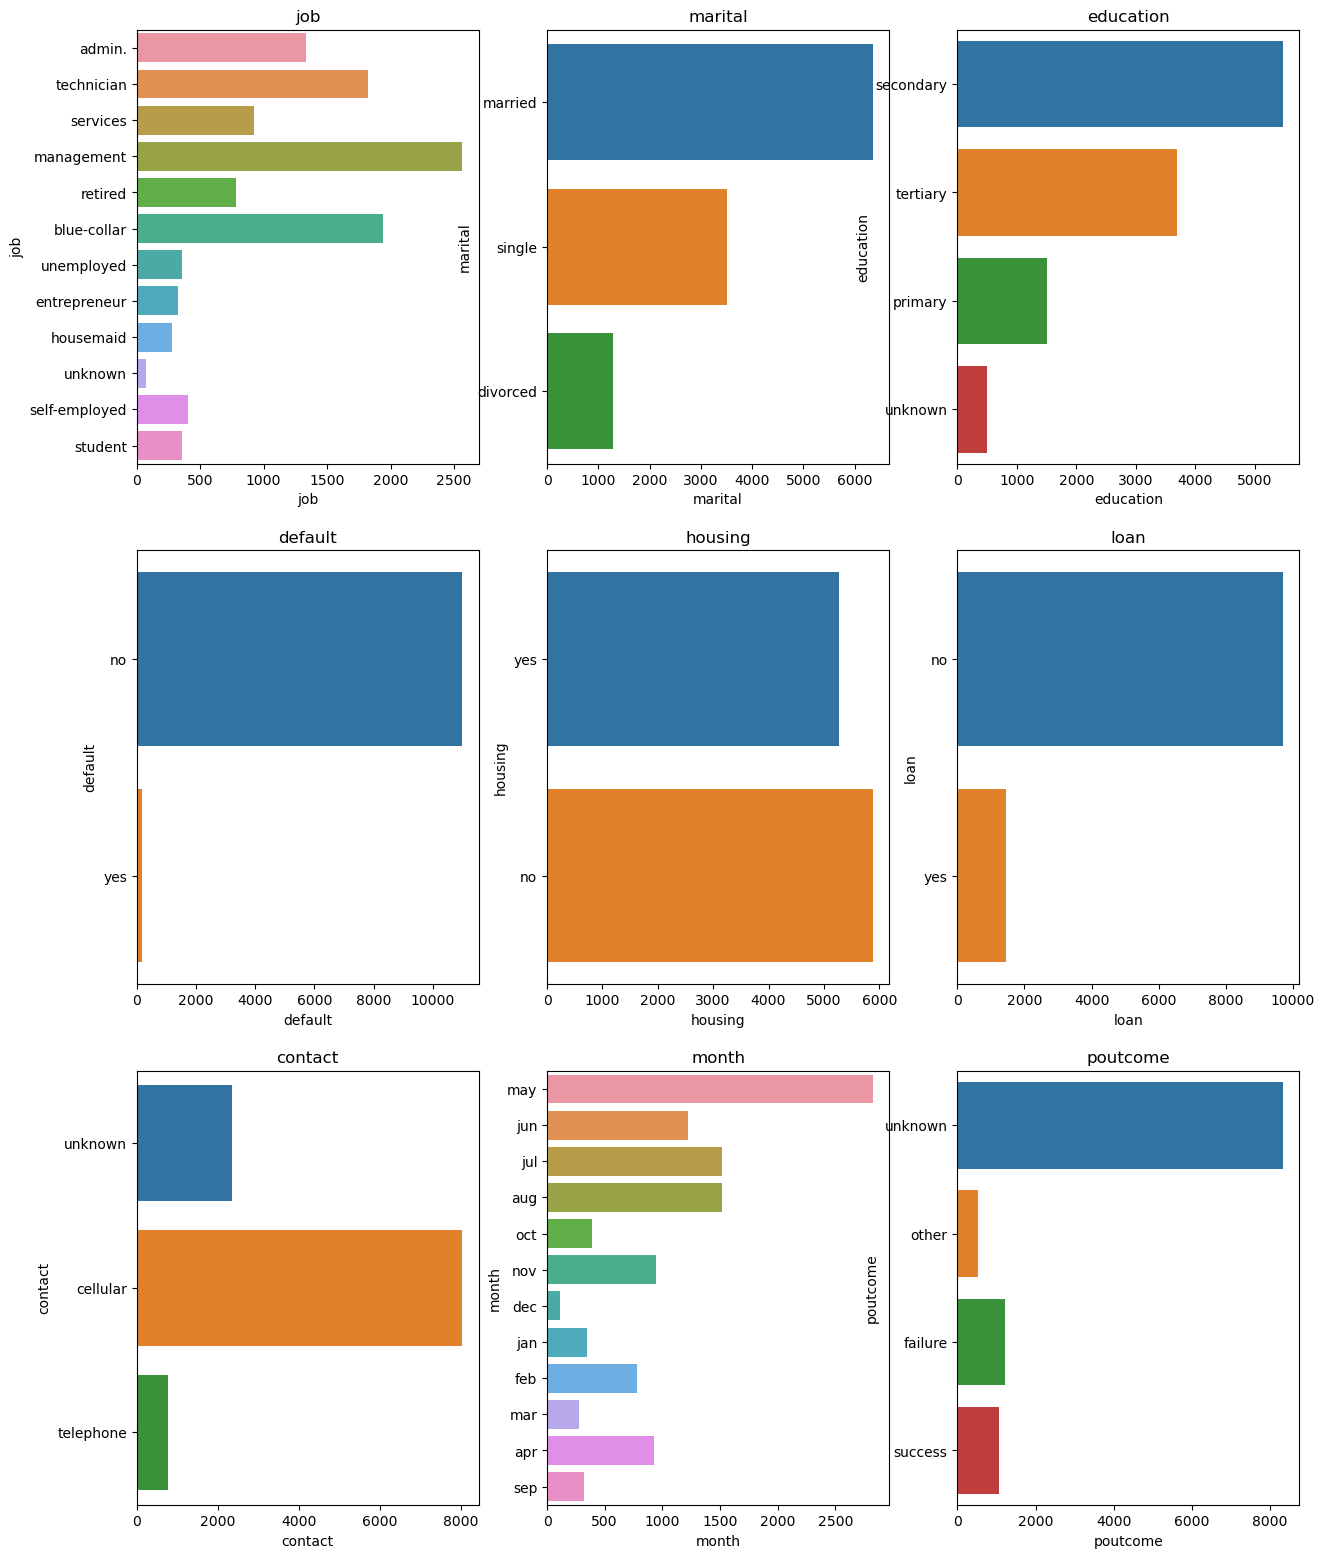

In [24]:
plt.figure(figsize=(15,80), facecolor= 'white')
plotnumber=1
for categories in categorical_features:
    a=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categories,data=bank_data)
    plt.xlabel(categories)
    plt.title(categories)
    plotnumber+=1
plt.show()

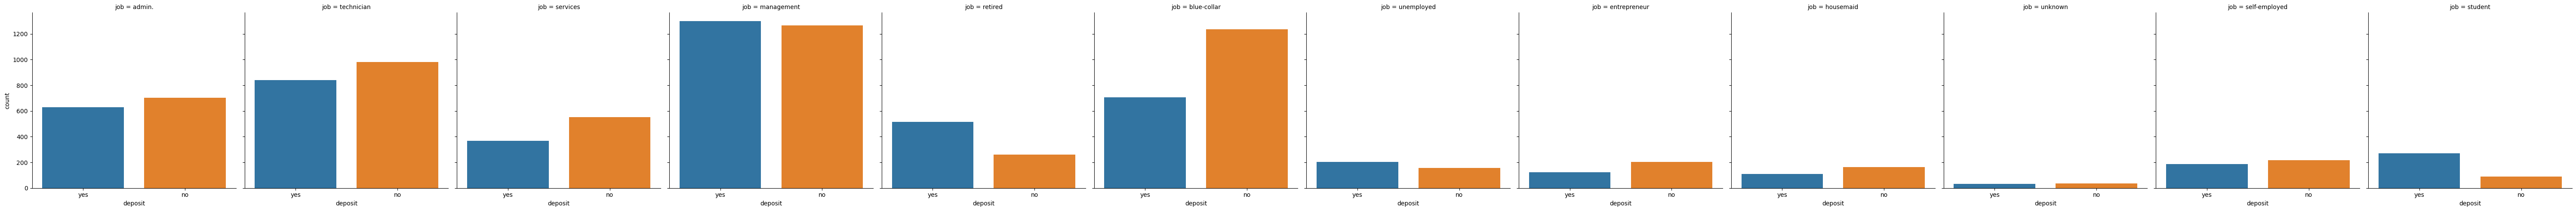

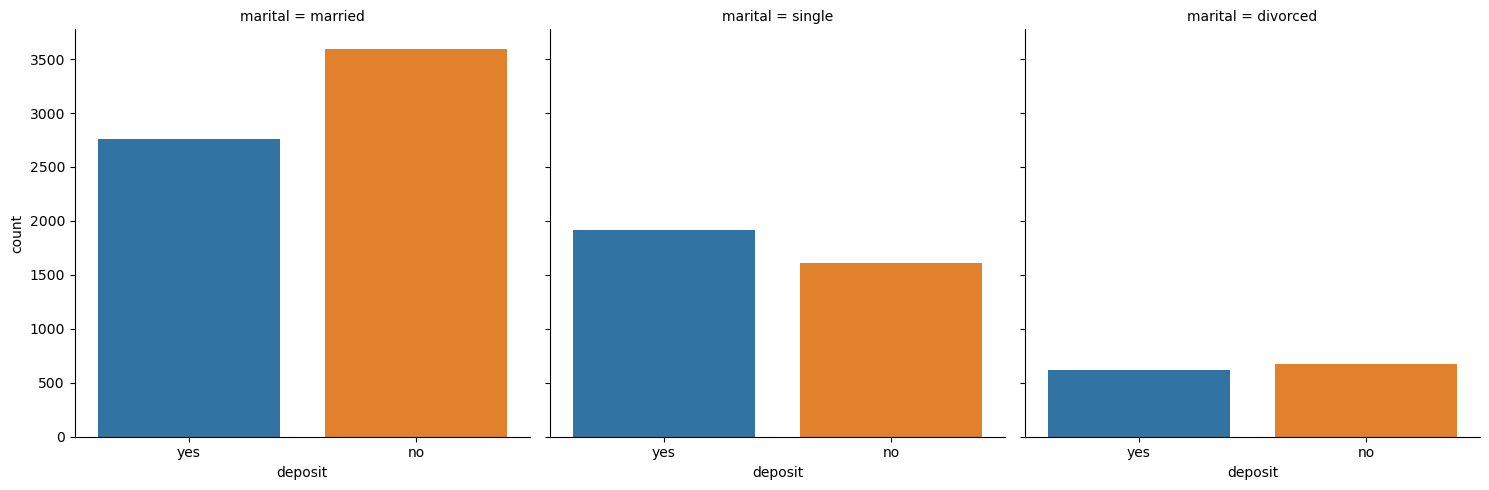

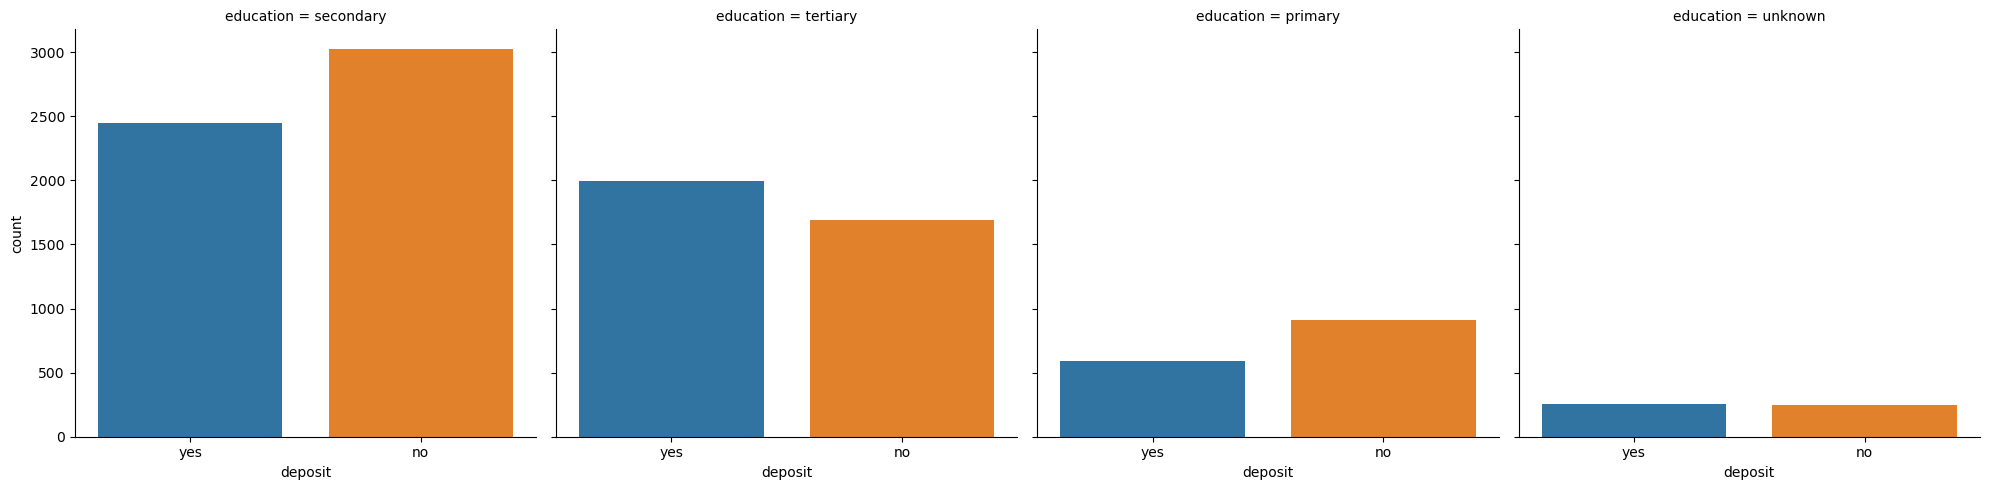

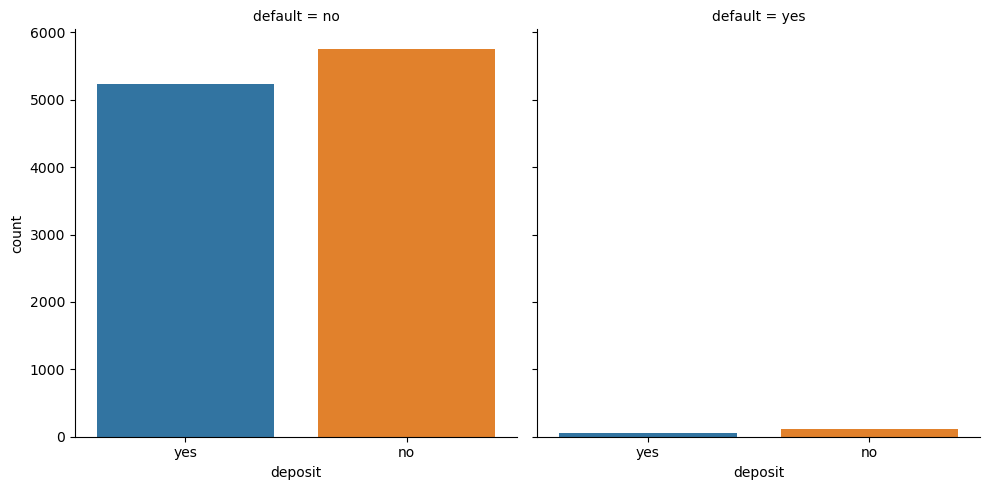

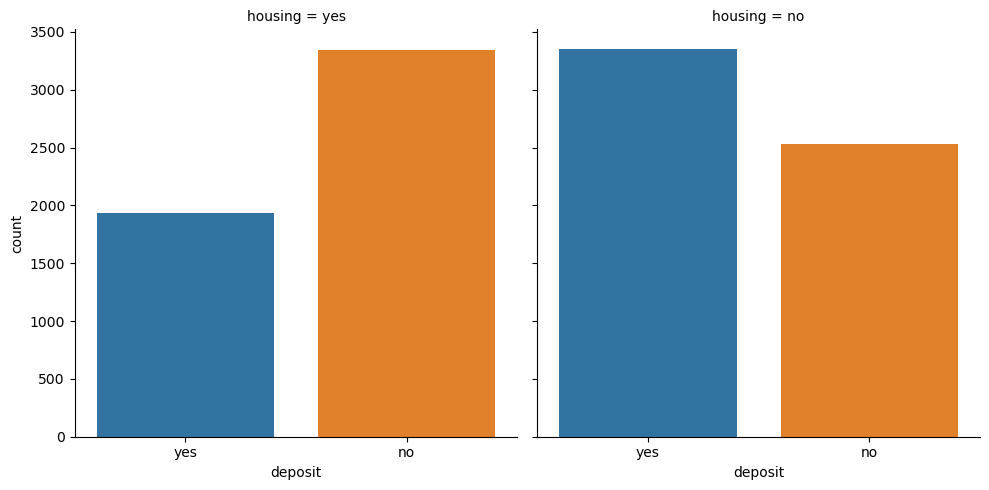

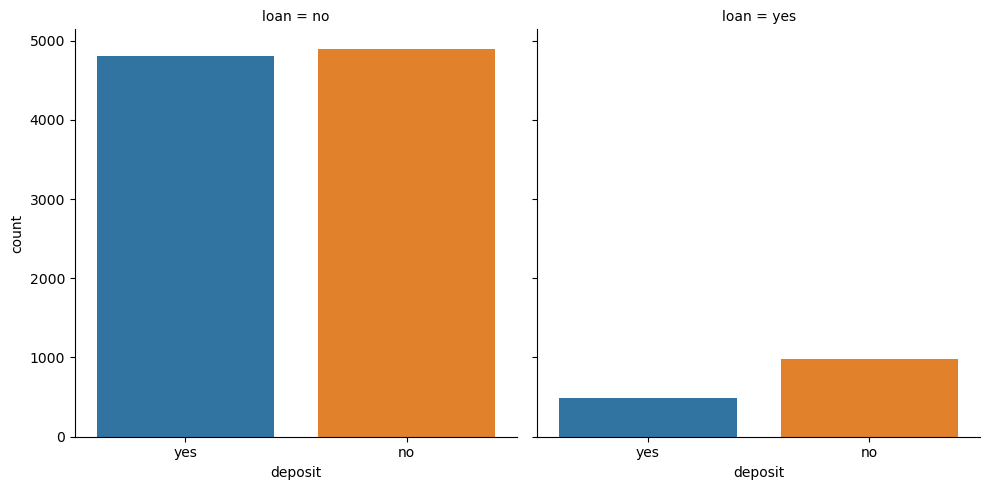

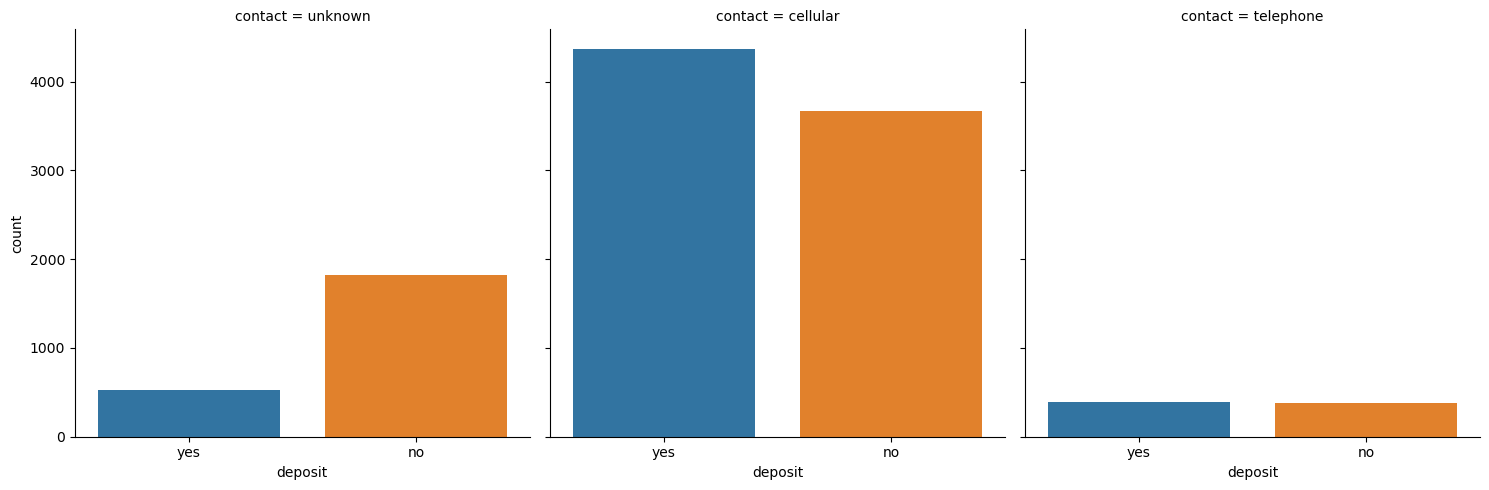

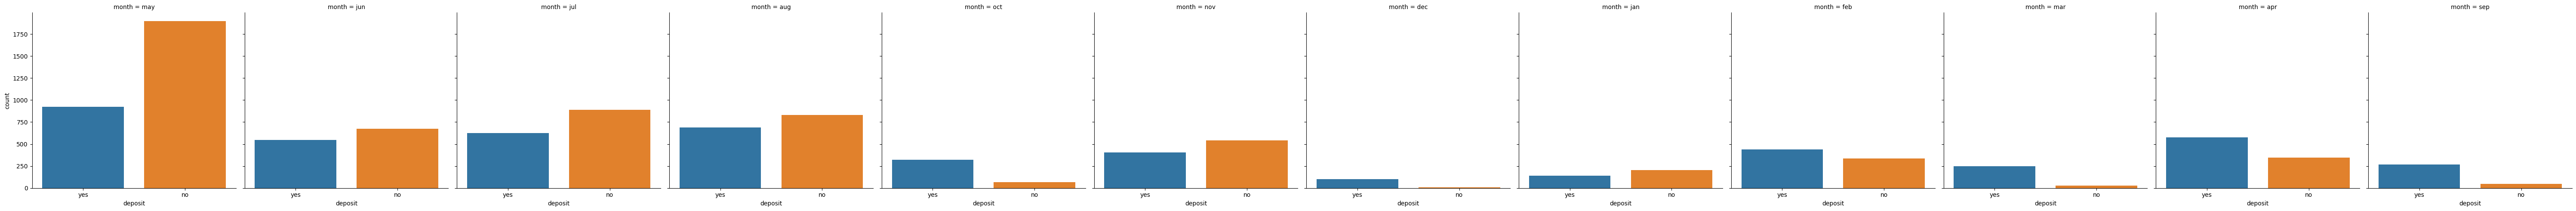

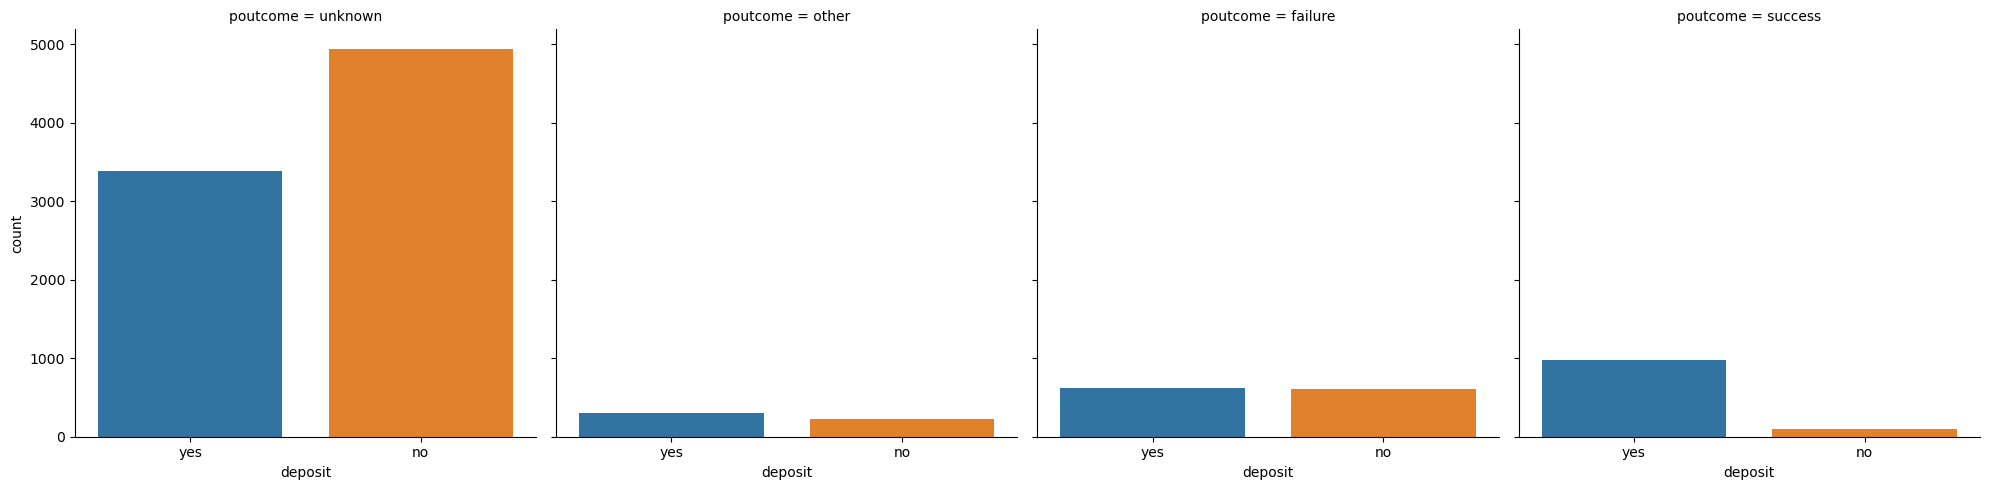

In [25]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data=bank_data)
plt.show()

In [26]:
#Check target label over categorical feature and find the count
for categorical_feature in categorical_features:
    print(bank_data.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

In [27]:
#To explore the numerical features
numerical_features=[feature for feature in bank_data.columns if ((bank_data[feature].dtype !='O') & (feature not in ['deposit']))]
print('Number of numerical variables: ',len(numerical_features))

Number of numerical variables:  7


In [29]:
bank_data[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [30]:
#To find the discrete features
discrete_feature=[feature for feature in numerical_features if len(bank_data[feature].unique())<25]
print("Discrete Variable Count: {}" .format(len(discrete_feature)))

Discrete Variable Count: 0


In [31]:
#To find conitinous features
continous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continous feature Count {}" .format(len(continous_features)))

Continous feature Count 7


C:\Users\Shivangi Chaurasia\AppData\Local\Temp\ipykernel_21332\1689246591.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[continous_feature])
C:\Users\Shivangi Chaurasia\Documents\data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shivangi Chaurasia\AppData\Local\Temp\ipykernel_21332\1689246591.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to us

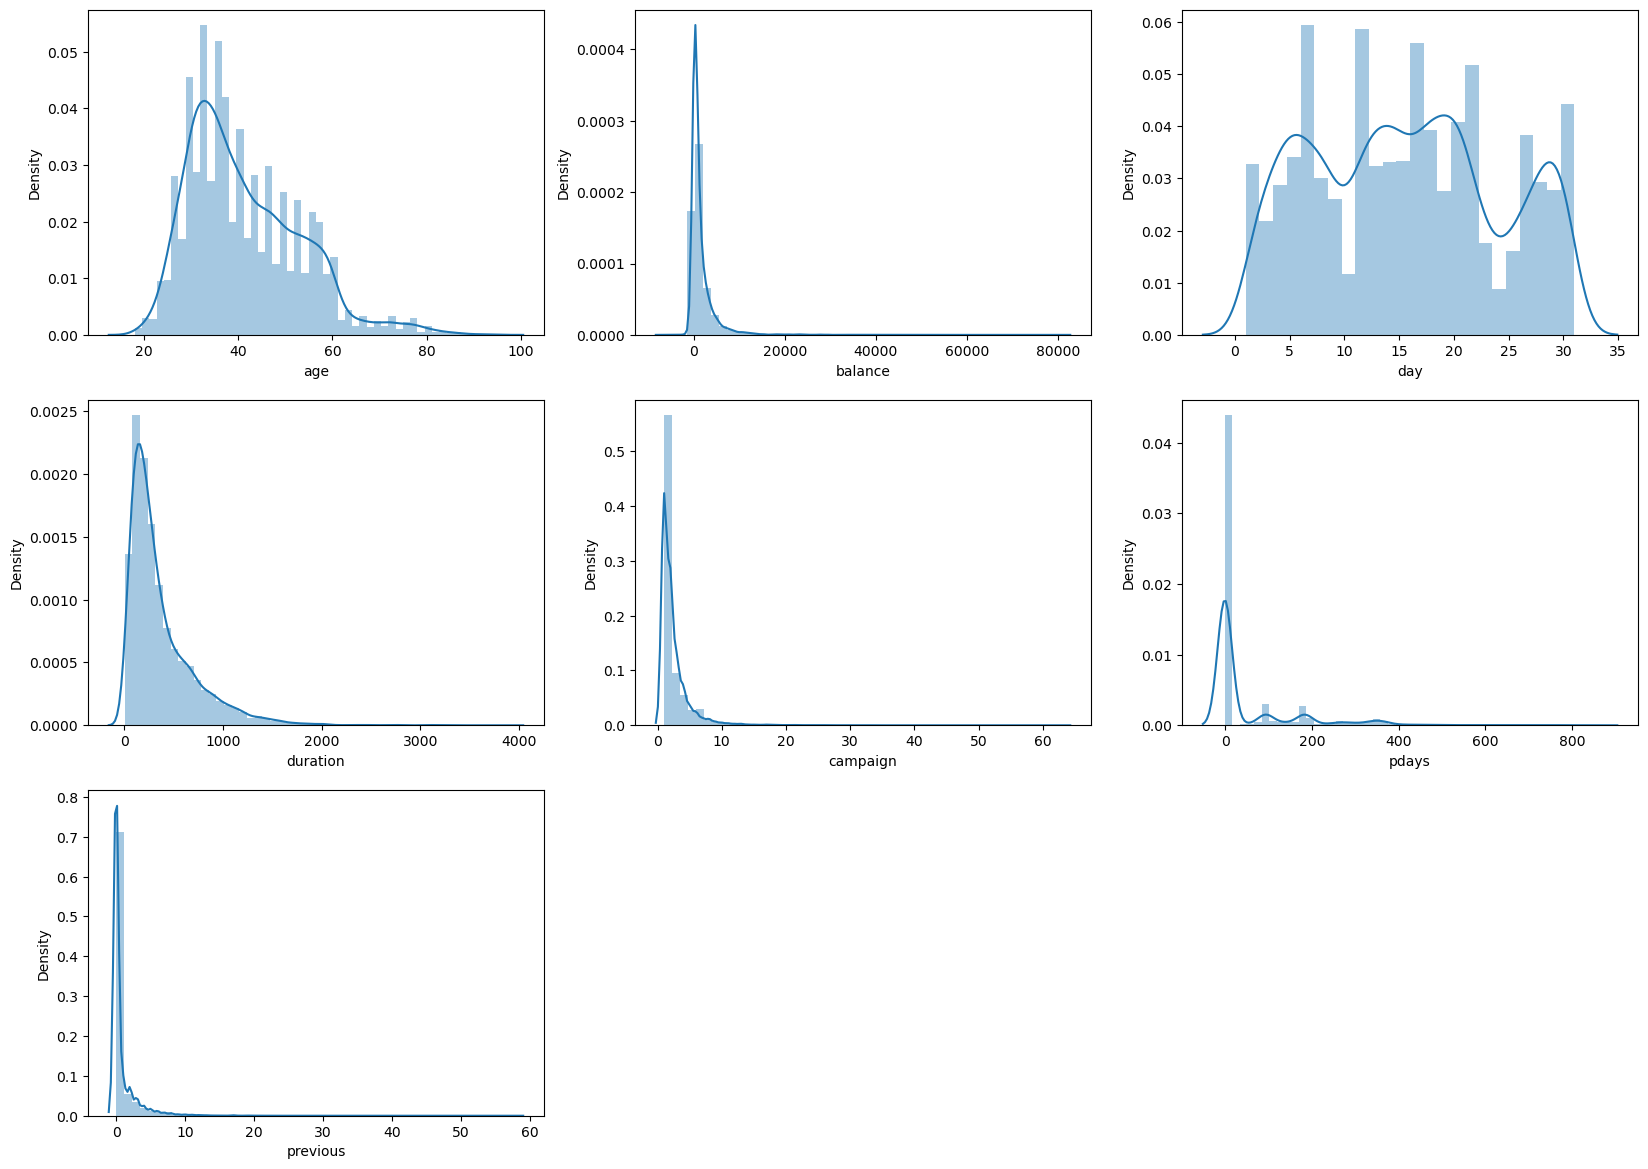

In [33]:
#plot a universe distribution of continous observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for continous_feature in continous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(bank_data[continous_feature])
    plt.xlabel(continous_feature)
    plotnumber+=1
plt.show()

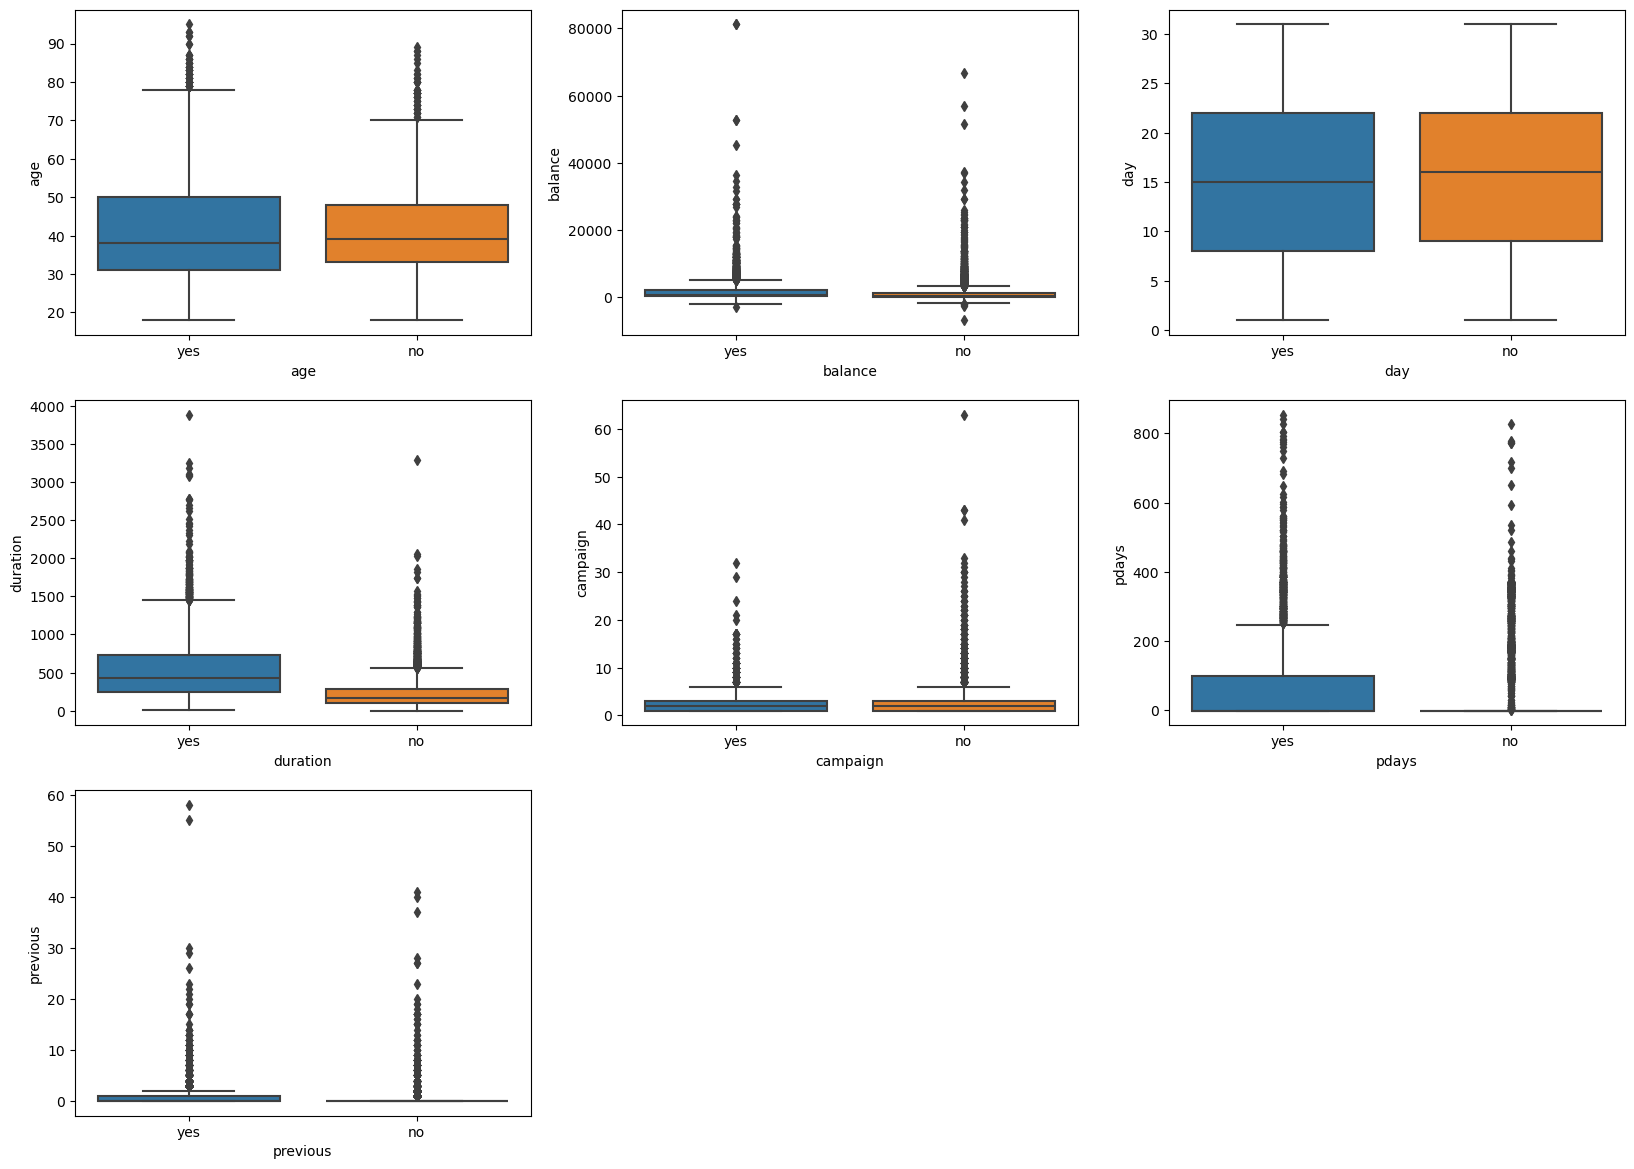

In [34]:
#boxpllot to show target distributioon with respect to numerical feature
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for feature in continous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y=bank_data[feature], data=bank_data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

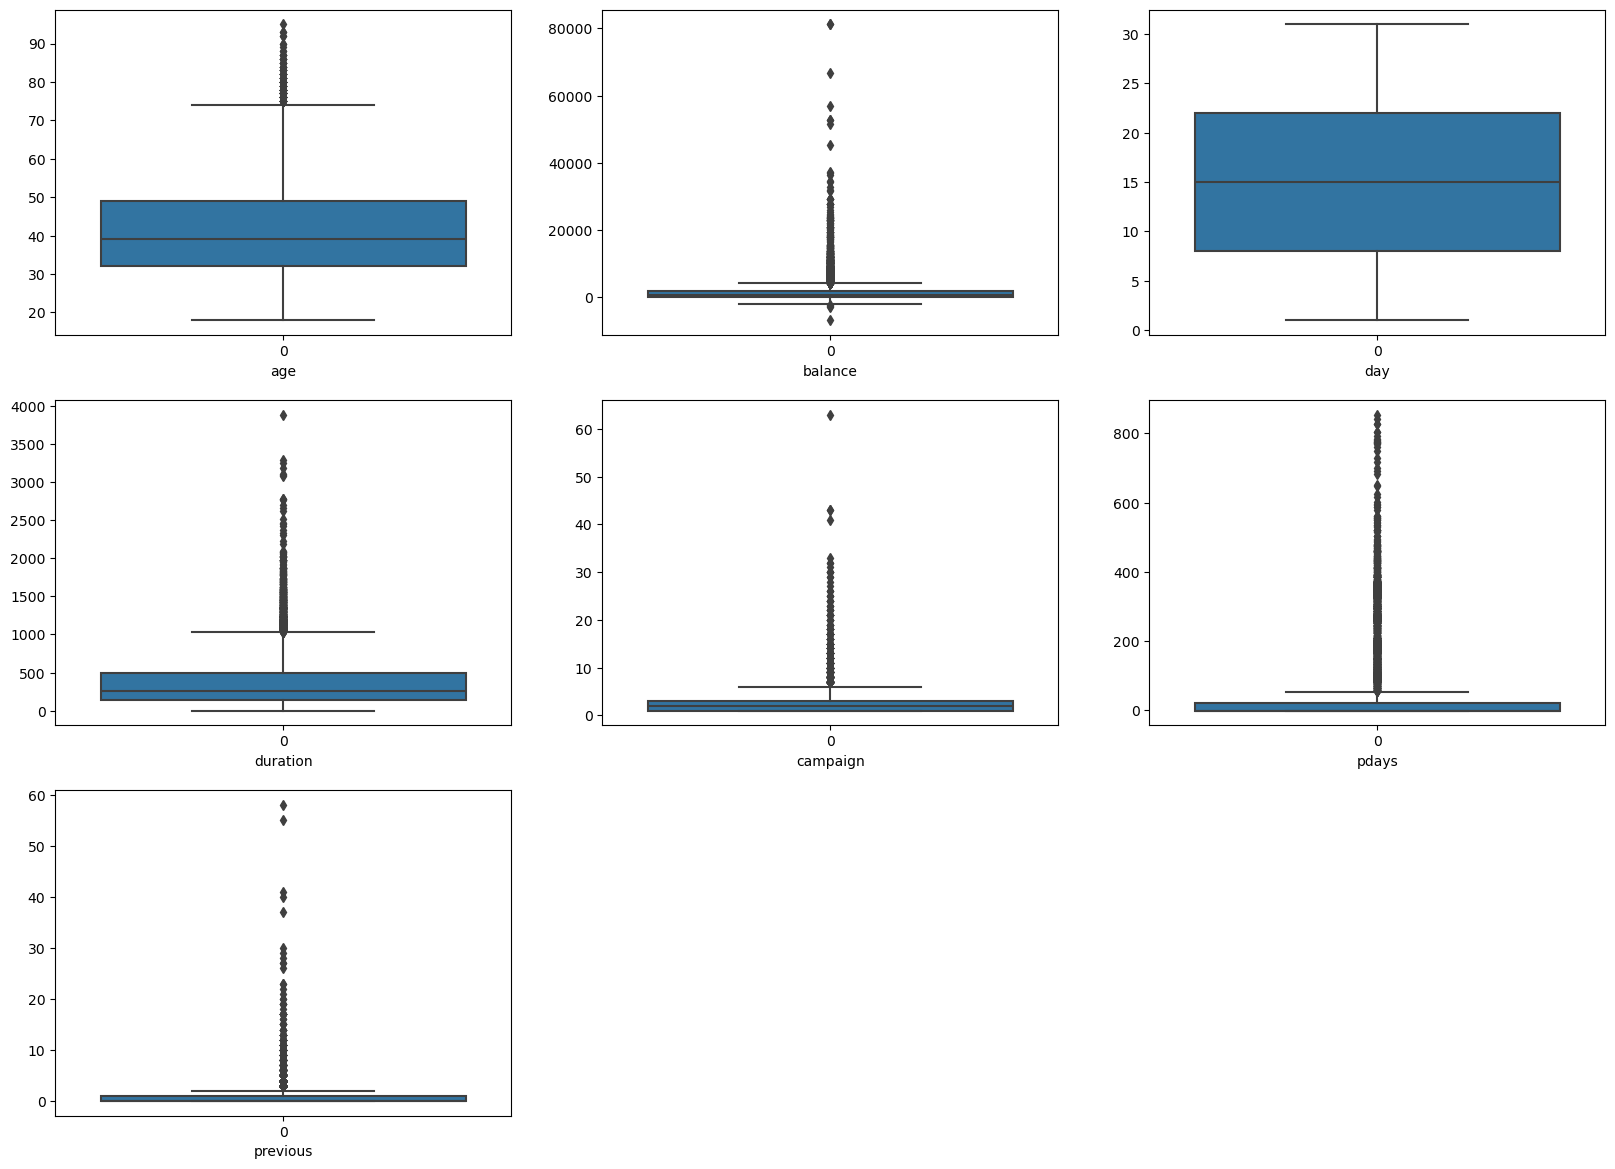

In [35]:
#boxplot on numerical features to find an outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(bank_data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

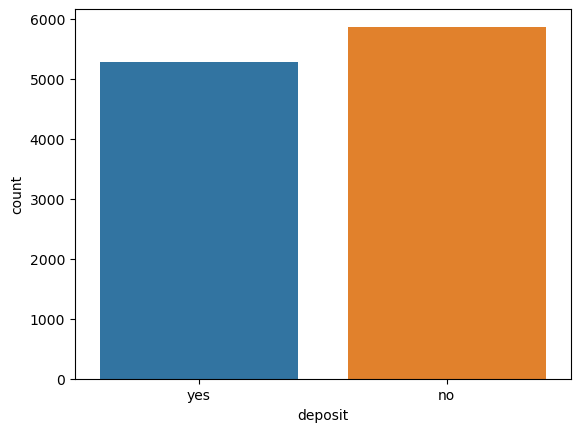

In [37]:
#check the data set is balanced or not based on target values in classification 
sns.countplot(x='deposit',data=bank_data)
plt.show()

In [38]:
bank_data['deposit'].groupby(bank_data['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

**Feature Engineering**

In [39]:
df=bank_data.copy()

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [41]:
df.shape

(11162, 17)

In [42]:
#default features does not play important role
df.groupby(['deposit' , 'default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [43]:
df.drop(['default'],axis=1,inplace= True)

In [44]:
df.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [45]:
#drop pdays as it has -1 value around 40%+
df.drop(['pdays'],axis=1,inplace= True)

In [46]:
#remove outliers in feature age
df.groupby('age', sort=True)['age'].count()

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [47]:
#remove outliers in feature balance
df.groupby(['deposit','balance'], sort=True)['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

We will not remove the outliers as the client shows interest to deposit as the balance goes higher

In [48]:
#remove outliers in feature duration
df.groupby(['deposit','duration'], sort=True)['duration'].count()

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

We will not remove the outliers as the client shows interest to deposit as the duration goes higher

In [49]:
#remove outliers in feature campaign
df.groupby(['deposit','campaign'], sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [50]:
df2=df[df['campaign']<33]

In [51]:
df2.groupby(['deposit','campaign'], sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [52]:
#remove outliers in feature previous
df2.groupby(['deposit','previous'], sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [53]:
df3=df2[df2['previous']<31]

In [54]:
cat_columns=['job','marital','education','contact','month','poutcome']
for col in cat_columns:
    df3=pd.concat([df3.drop(col,axis=1),pd.get_dummies(df3[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)])

In [55]:
bool_columns=['housing','loan','deposit']
for col in bool_columns:
    df3[col+'_new']=df3[col].apply(lambda x: 1 if x== 'yes' else 0)
    df3.drop(col, axis=1, inplace= True)

In [56]:
df3.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59.0,2343.0,5.0,1042.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
1,56.0,45.0,5.0,1467.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
2,41.0,1270.0,5.0,1389.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
3,55.0,2476.0,5.0,579.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
4,54.0,184.0,5.0,673.0,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1


In [59]:
df4=df3.fillna(0)
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59.0,2343.0,5.0,1042.0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,56.0,45.0,5.0,1467.0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,41.0,1270.0,5.0,1389.0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,55.0,2476.0,5.0,579.0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,54.0,184.0,5.0,673.0,2.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Spliting data set into training and test set**

In [62]:
X=df4.drop(['deposit_new'],axis=1)
y=df4['deposit_new']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
len(X_test)

142746

In [64]:
len(X_train)

570982

**Model Selection**

In [71]:
#Using Randomforestclassifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
from sklearn.model_selection import cross_val_score
model_score=cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.99696139 0.99699642 0.99696136 0.99706645 0.9968125 ]
0.9969596238785776


In [75]:
from sklearn.model_selection import cross_val_score
model_score=cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.59244371 0.62158764 0.6203868  0.61644452 0.61517649]
0.6132078289477613


#create param
model_param={
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[10,50,100,130],
            'criterion': ['gini','entropy'],
            'max_depth': range(2,4,1),
            'max_features': ['auto','log2']
        }
    }
    'LinearRegression': {
       'model': 

**Model Building**

#On the basis of above models RandomForestClassifier gives the best mean score comparing to Linera Regression Model
model_RFC=RandomForestClassifier(objectives='binary:logistics',learning_rate=0.1,max_depth=10,n_estimators=100)


In [79]:
RF=RandomForestClassifier()

In [81]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
RF.score(X_test,y_test)

0.9970296890981183

**Accuracy:**

The overall accuracy of the model is 0.99 (99%), which means the model correctly predicts the class label for 90% of the instances in the test set. While this indicates that the model performs reasonably well overall, it's important to note that accuracy alone may not provide a complete picture, especially in the case of imbalanced datasets.
